In [5]:
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt

targetSize = 160                    # pixel dimension after ImageDataGenerator has processed
color = 'rgb'                       # use 'grayscale' for black/white, 'rgb' for color
classMode='categorical'             # use 'categorical' for > 2 class, 'binary' for two-class problems
input_path = 'datasets/img/vegetables'

In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255,  # change pixel value from 0-255 to 0.0 - 1.0
        shear_range=0.2, # distort the image sideways
        zoom_range=0.2,
        horizontal_flip=True
        )
# (use shear_range, zoom_range and horizontal_flip to "disturb" the images to reduce overfitting)

test_datagen = ImageDataGenerator(rescale=1./255) # no zoom or shear, since this is test data

training_set = train_datagen.flow_from_directory(
        input_path+'/train', # path to folder with images for training
        target_size=(targetSize, targetSize), # size of output image, f.x. 28 x 28 pixel
        batch_size=32, # how many images to load at a time
        class_mode=classMode,
        color_mode=color)

validation_set = train_datagen.flow_from_directory(
        input_path+'/validation', # path to folder with images for validation
        target_size=(targetSize, targetSize),
        batch_size=32,
        class_mode=classMode,
        color_mode=color)

test_set = test_datagen.flow_from_directory(
        input_path+'/test', # path to folder with images for testing
        target_size=(targetSize, targetSize),
        batch_size=32,
        class_mode=classMode,
        color_mode=color)   

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [7]:
model = Sequential() # instantiate new Sequential model object

model.add(Conv2D(filters=32,        # specify number of filters. Higher number for more complex images
               kernel_size=3,       # size of filter - typically 3, as in 3x3
               activation="relu",   # activation function, often 'relu' on layers before last
               input_shape=[targetSize, targetSize, 3])) # dimension of image, coming in from training set
               # here 28x28 pixel. '1' is number of color channels. B/W = 1, Color = 3.

model.add(MaxPool2D(pool_size=2, strides=2)) # reduce the image size. Here 4 pixels will become 1 pixel. 
# pool_size is the size of the square which will be converted to just one pixel. Often 2, as in 2x2.
# strides is how many pixels to move to the right after each pooling operation. Often 2. 
# You are free to add more layers of Conv2D and MaxPool2D to make the model smarter

model.add(Conv2D(filters=64, kernel_size=3, activation="relu", input_shape=[targetSize,targetSize,3]))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Conv2D(filters=256, kernel_size=3, activation="relu"))

model.add(Flatten())        # reshape to to a single vector
model.add(Dropout(0.5))     # ref: https://keras.io/api/layers/regularization_layers/dropout

model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=15, activation="softmax"))

adam = Adam(learning_rate=0.001) # use the Adam optimizer, specify learning-rate
# more than two classes => use categorical_crossentropy as loss function, and measure accuracy after each epoch
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(training_set, epochs=10, validation_data=validation_set) # train the model

Epoch 1/10


2022-11-05 15:44:18.920695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 1.6763 - accuracy: 0.4096

2022-11-05 15:45:02.513661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 52s 110ms/step - loss: 1.6763 - accuracy: 0.4096 - val_loss: 1.2522 - val_accuracy: 0.5793
Epoch 2/10
469/469 [==============================] - 50s 108ms/step - loss: 0.9779 - accuracy: 0.6659 - val_loss: 0.7815 - val_accuracy: 0.7397
Epoch 3/10
469/469 [==============================] - 51s 108ms/step - loss: 0.6161 - accuracy: 0.7893 - val_loss: 0.4877 - val_accuracy: 0.8437
Epoch 4/10
469/469 [==============================] - 50s 107ms/step - loss: 0.4313 - accuracy: 0.8553 - val_loss: 0.4215 - val_accuracy: 0.8630
Epoch 5/10
469/469 [==============================] - 51s 108ms/step - loss: 0.3659 - accuracy: 0.8785 - val_loss: 0.4686 - val_accuracy: 0.8480
Epoch 6/10
469/469 [==============================] - 51s 108ms/step - loss: 0.2644 - accuracy: 0.9145 - val_loss: 0.1988 - val_accuracy: 0.9413
Epoch 7/10
469/469 [==============================] - 51s 108ms/step - loss: 0.2315 - accuracy: 0.9265 - val_loss: 0.2294 - val_accuracy: 0.9

{'Bean': 0,
 'Bitter_Gourd': 1,
 'Bottle_Gourd': 2,
 'Brinjal': 3,
 'Broccoli': 4,
 'Cabbage': 5,
 'Capsicum': 6,
 'Carrot': 7,
 'Cauliflower': 8,
 'Cucumber': 9,
 'Papaya': 10,
 'Potato': 11,
 'Pumpkin': 12,
 'Radish': 13,
 'Tomato': 14}

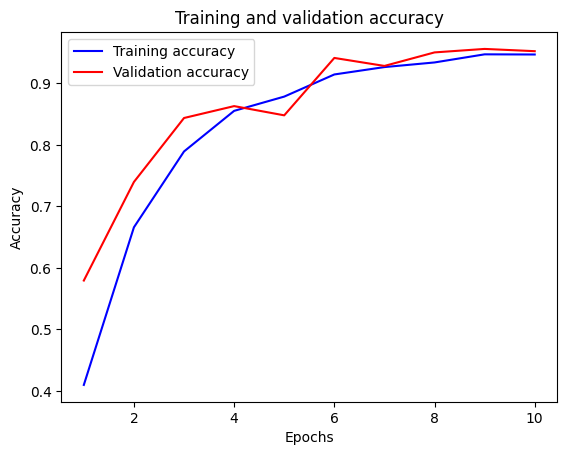

In [9]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [10]:
# model.save('models/vegetables.h5')
# model = load_model('models/vegetables.h5')
model.evaluate(test_set)

94/94 [==============================] - 3s 29ms/step - loss: 0.1424 - accuracy: 0.9583


[0.14235533773899078, 0.9583333134651184]

In [17]:
single_prediction = input_path + '/test/Tomato/1001.jpg'
test_image = image.image_utils.load_img(single_prediction, target_size=[targetSize,targetSize], color_mode=color)

test_image = image.image_utils.img_to_array(test_image) # convert image to array
test_image = np.expand_dims(test_image,axis=0)          # add extra dimension to hold batch

result = model.predict(test_image/255.0)                # normalize pixel values

print("result vector: ", result[0])
class_index = np.argmax(result[0])                      # get index of the largest number (the predicted class)
classes = list(training_set.class_indices.keys())       # classes array to map from class number to labels
print("this vegetable is a ", classes[class_index])     # print the inferred label

1/1 [==============================] - 0s 15ms/step
result vector:  [3.1424500e-03 6.9902898e-03 6.0886253e-02 1.0820410e-02 1.7301631e-05
 6.9940347e-06 8.9347605e-03 8.4081141e-04 8.1145381e-06 5.8483239e-04
 1.1873937e-02 6.8362802e-04 8.5038319e-06 4.1959336e-04 8.9478201e-01]
label inferred:  Tomato
